# Playing with Sunspotter Dataset
Following code is the imitation of example in [database](https://github.com/sunspotter/database/blob/master/example_analysis.py) repository.
## Reading data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
images = pd.read_csv("all_clear_dataset/lookup_properties.csv", sep=';')
fitsfiles = pd.read_csv("all_clear_dataset/lookup_timesfits.csv", sep=';')
classification = pd.read_csv("all_clear_dataset/classifications.csv", sep=';')
zoorank = pd.read_csv("all_clear_dataset/rankings.csv", sep=';')

## From the same dataframe

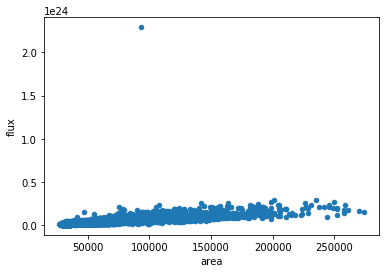

In [3]:
images.plot(x='area', y='flux', kind='scatter')

## Joining images with rank

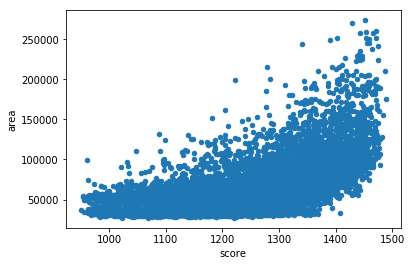

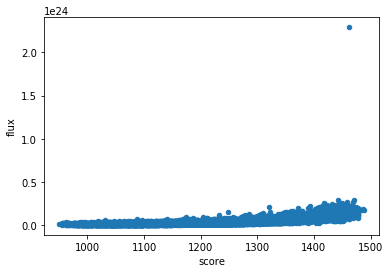

In [4]:
df = pd.merge(zoorank, images, how='inner', left_on='image_id', right_on='id')
df.plot(x='score', y='area', kind='scatter')
df.plot(x='score', y='flux', kind='scatter')

## Joining images, rank and fitsfiles (dates)

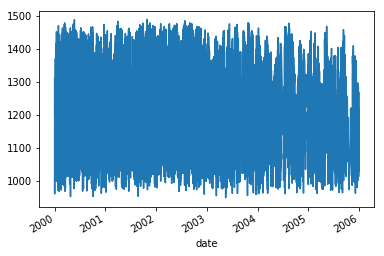

In [5]:
df1 = pd.merge(images, fitsfiles, how='inner', left_on='id_filename', right_on='id')
df = pd.merge(zoorank, df1, how='inner', left_on='image_id', right_on='id_x')
df['date'] = pd.to_datetime(df['obs_date'])
df.set_index('date', inplace=True)
df['score'].plot()

In [6]:
display(df.head())

,id,image_id,count,k_value,score,std_dev,id_x,filename_x,zooniverse_id,angle,area,areafrac,areathesh,bipolesep,c1flr24hr,id_filename,flux,fluxfrac,hale,hcpos_x,hcpos_y,m1flr12hr,m5flr12hr,n_nar,noaa,pxpos_x,pxpos_y,sszn,zurich,id_y,filename_y,obs_date
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-05-16 12:46:59,1,9843,50,8,950.403592,1.455031,9843,530be17a3ae74079c3004cf1.jpg,ASZ00001pz,42.2014,36800.0,-0.00,237.0,2.80,0,9843,1.280000e+22,-0.02,alpha,637.259800,-73.593013,0,0,1,10360,211.63060,153.80934,9843,axx,9843,20030516_1246_mdiB_1_0360.fits,2003-05-16 12:46:59
2000-04-24 12:51:03,2,999,50,8,953.549821,1.717277,999,530be1223ae74079c30007d9.jpg,ASZ00008tj,64.3741,53100.0,0.02,248.0,-1.00,0,999,1.580000e+22,0.02,beta,813.492460,-273.070680,0,0,1,8955,163.61865,191.88909,999,cso,999,20000424_1251_mdiB_1_8955.fits,2000-04-24 12:51:03
2000-10-04 12:51:02,3,2437,50,8,954.324334,2.209654,2437,530be1303ae74079c3001315.jpg,ASZ00009la,58.9458,55000.0,0.09,942.0,2.63,0,2437,2.270000e+22,0.02,alpha,631.491330,-594.304680,0,0,1,9180,179.67297,146.28921,2437,axx,2437,20001004_1251_mdiB_1_9180.fits,2000-10-04 12:51:02
2001-08-24 12:51:01,4,5013,50,8,955.205675,1.497922,5013,530be1493ae74079c3002735.jpg,ASZ00006us,4.6603,34000.0,-0.10,179.0,4.73,0,5013,5.060000e+21,-0.02,beta,72.051843,-147.618560,0,0,1,9593,191.25101,149.29808,5013,bxo,5013,20010824_1251_mdiB_1_9593.fits,2001-08-24 12:51:01
2003-03-10 12:47:00,5,9473,50,8,956.152484,1.888993,9473,530be1763ae74079c3004a0d.jpg,ASZ00001g3,72.2923,49000.0,0.04,2820.0,0.99,0,9473,2.810000e+22,0.05,beta,928.487990,97.902388,0,0,1,10309,201.35677,165.69570,9473,dso,9473,20030310_1247_mdiB_1_0309.fits,2003-03-10 12:47:00


In [7]:
df.columns

Index(['id', 'image_id', 'count', 'k_value', 'score', 'std_dev', 'id_x',
       'filename_x', 'zooniverse_id', 'angle', 'area', 'areafrac', 'areathesh',
       'bipolesep', 'c1flr24hr', 'id_filename', 'flux', 'fluxfrac', 'hale',
       'hcpos_x', 'hcpos_y', 'm1flr12hr', 'm5flr12hr', 'n_nar', 'noaa',
       'pxpos_x', 'pxpos_y', 'sszn', 'zurich', 'id_y', 'filename_y',
       'obs_date'],
      dtype='object')

# Downloading data from VSO using Sunpy

In [8]:
# Write code to acquire and read FITS files using Sunpy

# Predicting Score of Complexity
We choose 7 SMART detection properties as features for prediciton of score.

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [10]:
# choosing features and target class
features = ['angle', 'area', 'areafrac', 'areathesh', 'bipolesep', 'flux', 'fluxfrac', 'n_nar']
prediction = ['score']

X, y = df[features].values, df[prediction].values.reshape(-1)

In [15]:
# feature details
df[features].describe()

,angle,area,areafrac,areathesh,bipolesep,flux,fluxfrac,n_nar
count,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,1.296500e+04,12965.000000,12965.000000
mean,42.340812,57881.596606,0.003995,4353.975465,4.373199,3.928112e+22,-0.002444,1.219823
std,20.210125,30895.978507,0.115626,4041.296829,2.234991,3.733569e+22,0.158558,0.532897
min,0.000000,27000.000000,-0.720000,0.000000,-1.000000,4.050000e+21,-0.960000,1.000000
25%,24.822500,34200.000000,-0.060000,1600.000000,2.720000,1.770000e+22,-0.090000,1.000000
50%,40.672300,50000.000000,0.010000,3060.000000,4.200000,2.910000e+22,0.000000,1.000000
75%,60.742600,69200.000000,0.070000,5730.000000,5.790000,4.940000e+22,0.080000,1.000000
max,81.171600,274000.000000,0.570000,38200.000000,18.160000,2.290000e+24,0.590000,6.000000


In [27]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Linear Regression RMSE: %.4f' % rmse)
print('Linear Regression R squared: %.4f' % model.score(X_test, y_test))

Linear Regression RMSE: 133.7722
Linear Regression R squared: -0.3904


In [29]:
# Random Forest
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Random Forest RMSE: %.4f' % rmse)
print('Random Forest R squared: %.4f' % model.score(X_test, y_test))

Linear Regression RMSE: 41.9167
Linear Regression R squared: 0.8635


In [30]:
# Gradient Boosting
model = GradientBoostingRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Gradient Boosting RMSE: %.4f' % rmse)
print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))

Linear Regression RMSE: 41.3991
Linear Regression R squared: 0.8668


## Normalisation of data before training models

In [38]:
# 'angle', 'area', 'areathesh', 'flux' need to be normalized
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [39]:
# splitting data into training and test set (IMP: X_scaled is used here)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [40]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Linear Regression RMSE: %.4f' % rmse)
print('Linear Regression R squared: %.4f' % model.score(X_test, y_test))

Linear Regression RMSE: 76.6269
Linear Regression R squared: 0.5438


In [41]:
# Random Forest
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Random Forest RMSE: %.4f' % rmse)
print('Random Forest R squared: %.4f' % model.score(X_test, y_test))

Linear Regression RMSE: 41.9074
Linear Regression R squared: 0.8635


In [42]:
# Gradient Boosting
model = GradientBoostingRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Gradient Boosting RMSE: %.4f' % rmse)
print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))

Linear Regression RMSE: 41.4058
Linear Regression R squared: 0.8668


In [114]:
# MLP Regression
model = MLPRegressor((1000, 500, 200, 100), random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('MLP Regression RMSE: %.4f' % rmse)
print('MLP Regression R squared: %.4f' % model.score(X_test, y_test))

MLP Regression RMSE: 55.0330
MLP Regression R squared: 0.7647


We see Linear Regression is working better than before. Also, Min-Max scaling gives better results than standardization.

You can also see that Multi-layer perceptron regressor doesn't perform very well.
# Feature Reduction for Visualization
Note that we are using scaled value of X below.

In [108]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
new_df = pd.concat([principal_df, df[prediction].reset_index(drop=True)], axis = 1)
new_df.head()

,PC 1,PC 2,score
0,0.028909,-0.149442,950.403592
1,-0.259915,-0.206242,953.549821
2,-0.188238,-0.135271,954.324334
3,0.486335,-0.043576,955.205675
4,-0.354768,-0.178369,956.152484


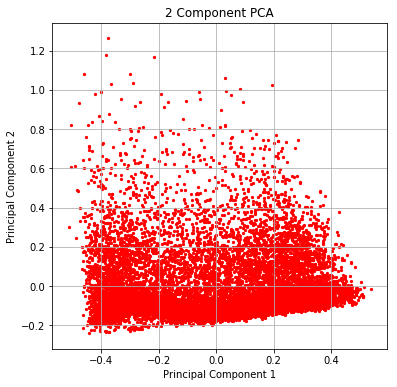

In [110]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 Component PCA')

ax.scatter(new_df[['PC 1']], new_df[['PC 2']], c = 'r', s = 5)

ax.grid()